### Filtering mobile phone spam sms uning Naive Bayes Algorithm

##### Read the dataset

In [38]:
# Read thedataset
sms_raw <- read.csv("sms_spam.csv", stringsAsFactors = FALSE)
head(sms_raw)

type,text
ham,Hope you are having a good week. Just checking in
ham,K..give back my thanks.
ham,Am also doing in cbe only. But have to pay.
spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
spam,okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm
ham,Aiya we discuss later lar... Pick u up at 4 is it?


In [39]:
str(sms_raw)

'data.frame':	5559 obs. of  2 variables:
 $ type: chr  "ham" "ham" "ham" "spam" ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline"| __truncated__ ...


In [40]:
# type variable converted chr to factor
sms_raw$type <- factor(x = sms_raw$type)

In [41]:
str(sms_raw$type)

 Factor w/ 2 levels "ham","spam": 1 1 1 2 2 1 1 1 2 1 ...


In [42]:
table(sms_raw$type)


 ham spam 
4812  747 

In [43]:
round(prop.table(table(sms_raw$type)) * 100, digits = 1)


 ham spam 
86.6 13.4 

#### Data preparation – processing text data for analysis

In [44]:
# Install the text mining package
install.packages("tm")

Installing package into 'C:/Users/Pappu/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'tm' is in use and will not be installed"

In [45]:
library(tm)

In [46]:
# Creating corpus
sms_corpus <- Corpus(VectorSource(sms_raw$text))


In [47]:
print(sms_corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5559


In [48]:
# See the content of the corpus
inspect(sms_corpus[1:3])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3

[1] Hope you are having a good week. Just checking in
[2] K..give back my thanks.                          
[3] Am also doing in cbe only. But have to pay.      


In [49]:
# Cleaning such as punctuations and other character etc.
# Convert to lower case
corpus_clean <- tm_map(sms_corpus, content_transformer(tolower))

Warning message in tm_map.SimpleCorpus(sms_corpus, content_transformer(tolower)):
"transformation drops documents"

In [50]:
inspect(corpus_clean[1:3])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3

[1] hope you are having a good week. just checking in
[2] k..give back my thanks.                          
[3] am also doing in cbe only. but have to pay.      


In [51]:
# Remove any numbers
corpus_clean <- tm_map(corpus_clean, removeNumbers)

Warning message in tm_map.SimpleCorpus(corpus_clean, removeNumbers):
"transformation drops documents"

In [52]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope you are having a good week. just checking in                                                                          
[2] k..give back my thanks.                                                                                                    
[3] am also doing in cbe only. but have to pay.                                                                                
[4] complimentary  star ibiza holiday or â£, cash needs your urgent collection.  now from landline not to lose out! boxskwpppm+


In [53]:
# use stopwords() function to remove filler words such as um, uh, er, ah, like, okay, right, and you know

In [54]:
head(stopwords(), 50)

[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       
[16] "his"        "himself"    "she"        "her"        "hers"      
[21] "herself"    "it"         "its"        "itself"     "they"      
[26] "them"       "their"      "theirs"     "themselves" "what"      
[31] "which"      "who"        "whom"       "this"       "that"      
[36] "these"      "those"      "am"         "is"         "are"       
[41] "was"        "were"       "be"         "been"       "being"     
[46] "have"       "has"        "had"        "having"     "do"

In [55]:
corpus_clean <- tm_map(corpus_clean, removeWords, stopwords())

Warning message in tm_map.SimpleCorpus(corpus_clean, removeWords, stopwords()):
"transformation drops documents"

In [56]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope     good week. just checking                                                                        
[2] k..give back  thanks.                                                                                    
[3]  also   cbe .    pay.                                                                                    
[4] complimentary  star ibiza holiday  â£, cash needs  urgent collection.  now  landline   lose ! boxskwpppm+


In [57]:
# Remove punctuation
corpus_clean <- tm_map(corpus_clean, removePunctuation)

Warning message in tm_map.SimpleCorpus(corpus_clean, removePunctuation):
"transformation drops documents"

In [58]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope     good week just checking                                                                     
[2] kgive back  thanks                                                                                   
[3]  also   cbe     pay                                                                                  
[4] complimentary  star ibiza holiday  â£ cash needs  urgent collection  now  landline   lose  boxskwpppm


In [59]:
# remove additional whitespaces that are created due to remove numbers, stopwords, punctuations 
corpus_clean <- tm_map(corpus_clean, stripWhitespace)

Warning message in tm_map.SimpleCorpus(corpus_clean, stripWhitespace):
"transformation drops documents"

In [60]:
inspect(corpus_clean[1:4])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4

[1] hope good week just checking                                                                 
[2] kgive back thanks                                                                            
[3]  also cbe pay                                                                                
[4] complimentary star ibiza holiday â£ cash needs urgent collection now landline lose boxskwpppm


In [61]:
#Creating a sparse matrix to split the messages into individual words
sms_dtm <- DocumentTermMatrix(corpus_clean)

In [62]:
str(sms_dtm)

List of 6
 $ i       : int [1:42627] 1 1 1 1 1 2 2 2 3 3 ...
 $ j       : int [1:42627] 1 2 3 4 5 6 7 8 9 10 ...
 $ v       : num [1:42627] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 5559
 $ ncol    : int 7909
 $ dimnames:List of 2
  ..$ Docs : chr [1:5559] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:7909] "checking" "good" "hope" "just" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


#### Data preparation crating training and test datasets

In [63]:
#splitting the raw dataframe
sms_raw_train <- sms_raw[1:4169, ]
sms_raw_test <- sms_raw[4170:5559, ]

In [64]:
head(sms_raw_train)

type,text
ham,Hope you are having a good week. Just checking in
ham,K..give back my thanks.
ham,Am also doing in cbe only. But have to pay.
spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
spam,okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm
ham,Aiya we discuss later lar... Pick u up at 4 is it?


In [65]:
#splitting the document-term matrix
sms_dtm_train <- sms_dtm[1:4169, ]
sms_dtm_test <- sms_dtm[4170:5559, ]

In [66]:
#splitting the corpus
sms_corpus_train <- corpus_clean[1:4169]
sms_corpus_test <- corpus_clean[4170:5559]

In [67]:
inspect(sms_corpus_train[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] hope good week just checking                                                                        
[2] kgive back thanks                                                                                   
[3]  also cbe pay                                                                                       
[4] complimentary star ibiza holiday â£ cash needs urgent collection now landline lose boxskwpppm       
[5] okmail dear dave final notice collect tenerife holiday cash award call landline tcs sae box cwwx ppm


In [68]:
#confirm that the subsets are representative of the complete set of SMS data
round(prop.table(table(sms_raw_train$type)) * 100, digits = 1)


 ham spam 
86.5 13.5 

In [69]:
round(prop.table(table(sms_raw_test$type)) * 100, digits=1)


 ham spam 
86.8 13.2 

##### Both the training data and test data contain about 13 percent spam.

# Visualizing text data – word clouds

In [70]:
# install wordcloud package
install.packages("wordcloud")

Installing package into 'C:/Users/Pappu/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'wordcloud' is in use and will not be installed"

In [71]:
library("wordcloud")

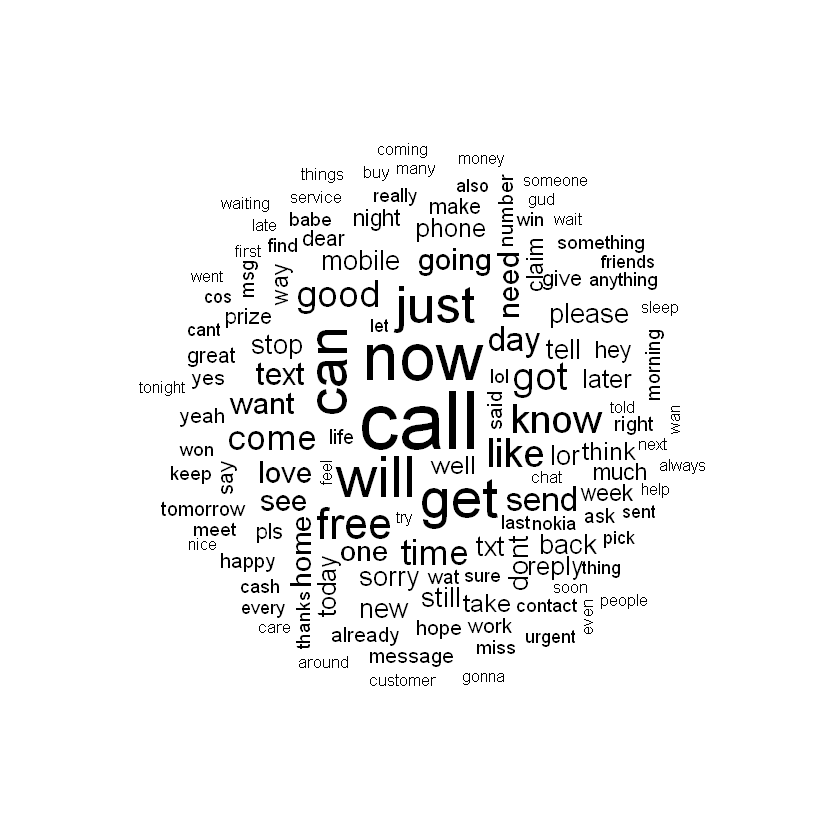

In [72]:
wordcloud(sms_corpus_train, min.freq = 40, random.order = FALSE)

In [73]:
# Create subset of the sms_raw_train for the sms type
spam <- subset(sms_raw_train, type == "spam")
ham <- subset(sms_raw_train, type == "ham")

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"

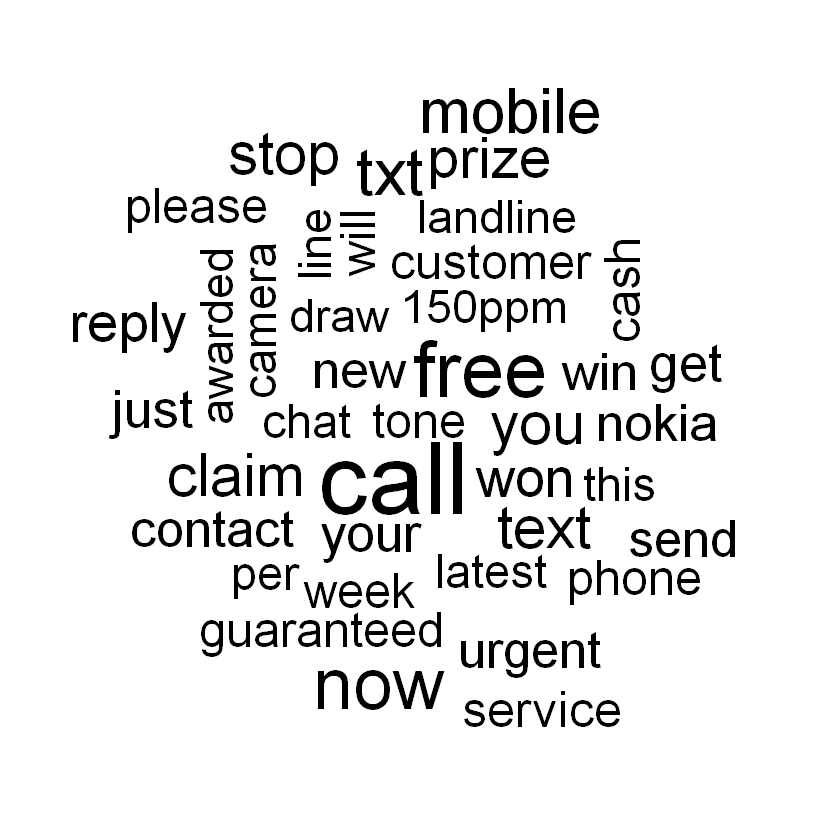

In [74]:
wordcloud(spam$text, max.words = 40, scale = c(5, 2))

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"

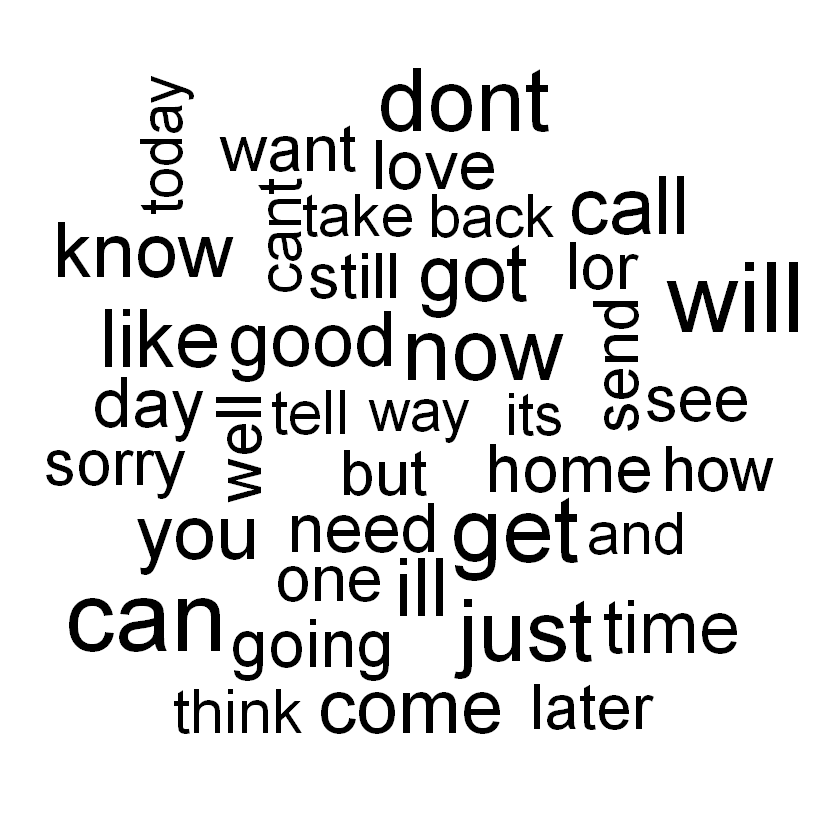

In [75]:
wordcloud(ham$text, max.words = 40, scale = c(5, 2))

#### Data preparation – creating indicator features for frequent words

In [76]:
#findFreqTerms(sms_dtm_train, 5)

In [77]:
# Finding frequent words
sms_dict <- findFreqTerms(sms_dtm_train, 5)

In [78]:
sms_train <- DocumentTermMatrix(sms_corpus_train, list(dictionary = sms_dict))
sms_test <- DocumentTermMatrix(sms_corpus_test, list(dictionary = sms_dict))

In [79]:
str(sms_train)

List of 6
 $ i       : int [1:23848] 1 1 1 1 1 2 2 3 3 4 ...
 $ j       : int [1:23848] 1 2 3 4 5 6 7 8 9 10 ...
 $ v       : num [1:23848] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 4169
 $ ncol    : int 1215
 $ dimnames:List of 2
  ..$ Docs : chr [1:4169] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:1215] "checking" "good" "hope" "just" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [80]:
convert_counts <- function(x) {
    x <- ifelse(x > 0, 1, 0)
    x <- factor(x, levels = c(0, 1), labels = c("No", "Yes"))
    return (x)
}

In [81]:
sms_train <- apply(sms_train, MARGIN = 2, convert_counts)
sms_test <- apply(sms_test, MARGIN = 2, convert_counts)

#### Training a model on the data

In [82]:
#install e1071 package for naive bayes implementation
install.packages("e1071")

Installing package into 'C:/Users/Pappu/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6 1.7-11              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Pappu\AppData\Local\Temp\RtmpKCb9eK\downloaded_packages


In [83]:
library("e1071")

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [84]:
# Build the model
sms_classifier <- naiveBayes(sms_train, sms_raw_train$type, laplace = 0)

#### Evaluating model performance

In [89]:
sms_test_pred <- predict(sms_classifier, sms_test)
sms_test_pred

[1] ham  ham  ham  ham  spam ham  ham  ham  ham  spam ham  ham  ham  spam
  [15] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
  [29] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  spam ham  ham 
  [43] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham 
  [57] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
  [71] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
  [85] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
  [99] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam spam ham 
 [113] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [127] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham 
 [141] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  spam ham 
 [155] spam ham  ham  ham  spam ham  ham  ham  ham  ham  spam ham  ham  ham 
 [169] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham 
 [183] ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham 
 [197] ham  ham  ham  spam spam ham  ham  ham  ham  ham  ham  ham  ham  spam
 [211] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham 
 [225] ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham 
 [239] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [253] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [267] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [281] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham 
 [295] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [309] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [323] ham  ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham 
 [337] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  spam spam ham  ham 
 [351] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [365] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [379] spam ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham 
 [393] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [407] ham  ham  spam ham  ham  ham  spam spam ham  ham  ham  ham  ham  ham 
 [421] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [435] ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [449] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [463] ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [477] ham  ham  spam ham  ham  ham  spam ham  ham  ham  ham  ham  ham  spam
 [491] ham  ham  ham  ham  ham  ham  spam ham  ham  spam spam spam ham  ham 
 [505] ham  ham  ham  ham  spam ham  ham  ham  ham  spam ham  ham  ham  ham 
 [519] ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
 [533] ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham  spam ham 
 [547] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [561] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [575] ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [589] ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [603] ham  ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham 
 [617] ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  spam ham 
 [631] ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham 
 [645] ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
 [659] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [673] ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  spam
 [687] spam ham  ham  spam ham  ham  spam ham  ham  ham  ham  ham  ham  ham 
 [701] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham 
 [715] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 

In [ ]:
install.packages("gmodels")

In [92]:
library("gmodels")

In [97]:
CrossTable(sms_test_pred, sms_raw_test$type, prop.chisq = FALSE, prop.t = FALSE, dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1203 |        32 |      1235 | 
             |     0.974 |     0.026 |     0.888 | 
             |     0.997 |     0.175 |           | 
-------------|-----------|-----------|-----------|
        spam |         4 |       151 |       155 | 
             |     0.026 |     0.974 |     0.112 | 
             |     0.003 |     0.825 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 


In [100]:
accuracy = (1203+151)/(1203+151+32+4)
accuracy

[1] 0.9741007

####  Improving model performance

In [102]:
# here we will set the laplace value = 1
sms_classifier2 <- naiveBayes(sms_train, sms_raw_train$type, laplace = 1)

In [103]:
sms_test_pred2 = predict(sms_classifier2, sms_test)

In [111]:
CrossTable(sms_test_pred2, sms_raw_test$type, prop.chisq = FALSE, prop.t = FALSE, dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1204 |        31 |      1235 | 
             |     0.975 |     0.025 |     0.888 | 
             |     0.998 |     0.169 |           | 
-------------|-----------|-----------|-----------|
        spam |         3 |       152 |       155 | 
             |     0.019 |     0.981 |     0.112 | 
             |     0.002 |     0.831 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 


In [113]:
accuracy = (1204+152)/(1204+151+31+3)
accuracy

[1] 0.9762419

### Accuracy has a small improvement